In [223]:
import os
import scipy
import pickle
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import yaml

import pickle

from dataclasses import dataclass
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

In [126]:
import scipy.io

In [35]:
os.listdir("D:")

['$RECYCLE.BIN',
 'CCM',
 'Charite_analysis_code',
 'OneDriveTemp',
 'pagefile.sys',
 'Programs',
 'Projects',
 'System Volume Information',
 'temp',
 'tmp',
 'User']

# Patients data

In [211]:
path = Path("D:/Projects/Clinical_Studies/CortBS_DEGUM_2022/06_Results/")
results_paths = []
for path_ in path.glob("*/"):
    results_paths.append(path_)
result_path_example = results_paths[0]

def inpute_nans(data_):
    row_, cols_ = np.where(~indices)
    if len(data_.shape) == 2:
        j_start,j_end  = min(cols_),max(cols_)
        i_start,i_end = min(row_),max(row_)
        inpute_data = data_[i_start:i_end,j_start:j_end]
        return inpute_data
    elif len(data_.shape) == 1:
        i_start,i_end = min(row_),max(row_)
        inpute_data = data_[i_start:i_end,j_start:j_end]
        return inpute_data        

def obtain_all_results(result_path_example):
    data_dict = {}
    data_files = []
    for data_file in result_path_example.glob("*.mat"):
        data_files.append(data_file)
        
    for data_file in data_files:
        mat = scipy.io.loadmat(data_file,squeeze_me=True, struct_as_record=False)
        result = mat["result"]
        data_dict["{0}_{1}".format(result_path_example.name,data_file.name)] = result
        
    return data_dict

In [138]:
full_data = {}
for result_path_example in tqdm(results_paths):
    full_data.update(obtain_all_results(result_path_example))

100%|████████████████████████████████████████████████████████████████████████████████| 127/127 [00:03<00:00, 32.97it/s]


In [140]:
result = full_data['133B_Cortbs_report_no2.mat']

In [143]:
#result

In [130]:
shapes_ = []
for data_name,y_diff in full_data.items():
    shapes_.append((y_diff.shape))
set(shapes_)

{(88, 24)}

In [226]:
selected_client_data = {"names":[],
                        "y_diff":[],
                        "PoDm_dist":[]}

for name_, result in full_data.items():
    selected_client_data["names"].append(name_)
    
    data_ = result.Ydiff
    inpute_data = inpute_nans(data_)
    selected_client_data["y_diff"].append(inpute_data)
    
    selected_client_data["PoDm_dist"].append(result.PoDm_dist)

In [228]:
with open(Path("./data/client_.cp"),"wb") as file:
    pickle.dump(selected_client_data,file)

# Simulations

In [149]:
from preprocess_simulation_data import pick_data,inpute_data_cut
from pathlib import Path

In [159]:
data_path = Path("./data/")
mat_path = list(data_path.glob("*.mat"))[0]
mat = scipy.io.loadmat(mat_path,squeeze_me=True, struct_as_record=False)

In [231]:
all_nds = mat["NDS"].transpose(2,0,1)
number_of_examples = all_nds.shape[0]


selected_simulations_data = {"nds":[],
                             "PoDmD":[],
                             "name":[]}

for example_index in range(number_of_examples):
    nds_example = all_nds[example_index]
    selected_simulations_data["nds"].append(inpute_nans(nds_example))
    
    selected_simulations_data["PoDmD"].append(mat["PoDmD"][example_index])
    
    selected_simulations_data["name"].append(example_index)

In [234]:
selected_simulations_data["nds"][0].shape

(11, 24)

In [235]:
with open(Path("./data/simulations_.cp"),"wb") as file:
    pickle.dump(selected_simulations_data,file)

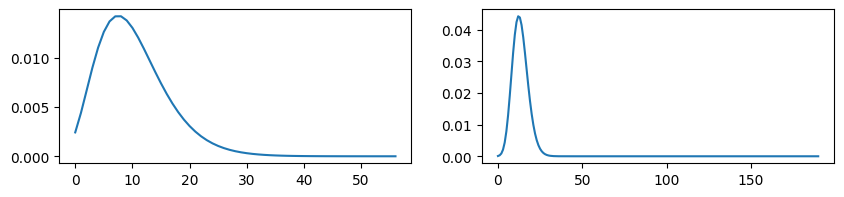

In [215]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(10,2))
axs[0].plot(mat["PoDmD"][100])
axs[1].plot(result.PoDm_dist)

In [206]:
all_nds = mat["NDS"].transpose(2,0,1)
nds_example = all_nds[19,:,:]
ydiff_example = result.Ydiff

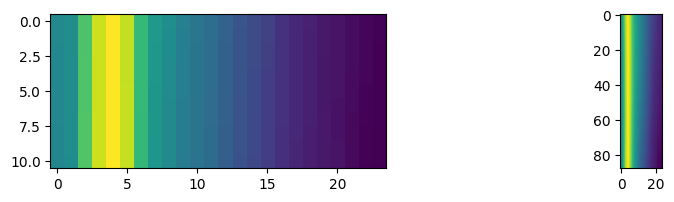

In [205]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(10,2))
axs[0].imshow(inpute_nans(nds_example))
axs[1].imshow(inpute_nans(ydiff_example))

In [207]:
inpute_nans(ydiff_example).shape

(88, 24)

In [209]:
shapes_ = []
number_of_examples = all_nds.shape[0]
for example_index in range(number_of_examples):
    nds_example = all_nds[example_index]
    shapes_.append(inpute_nans(nds_example).shape)